This problem was adapted from Professor Farimani's paper. If you are interested in learning more, you can read it <a href="https://www.nature.com/articles/s41699-018-0060-8.pdf">here</a>.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

In [16]:
# (a)
# data preprocessing
#import data
dataset=pd.read_csv('data.csv')

#get string labels
hd = list(dataset.columns)
check = ~dataset.columns.str.contains('^Unnamed') #get boolean of named and unnamed string label
header = []
for i in range(len(hd)):
    if check[i]:
        header.append(hd[i])
#map string label to numeric values
header = pd.factorize(header)[0]
#verify range of numeric label
assert(len(header) == 20) 

#import raw feature values
x = dataset.iloc[:,:].values
r = np.shape(x)[0] #number of data per label

#initialize rearranged data and label
X = x[:,[0,1]]
y = np.ones(r)*header[0]
#iterate to rearrange data and label
for i in range(2,len(header)*2, 2):
    arr = x[:, [i, i+1]]
    X = np.vstack((X, arr))
    y = np.hstack((y, np.ones(r)*header[int(i/2)]))
#verify shape of rearranged data and label
assert(X.shape[0] == 2000)
assert(y.shape[0] == 2000)
assert(X.shape[1] == 2)

# Save the preprocessed data as a new csv file as you may need that for problem 3
data = np.hstack((X, y.reshape(-1,1)))
dict = {'x1': data[:,0], 'x2': data[:,1], 'label': data[:,2]}
df = pd.DataFrame(dict)
df.to_csv('output_data.csv')

Accuracy of training dataset is 10.285714285714285 %
Accuracy of test dataset is 9.166666666666666 %


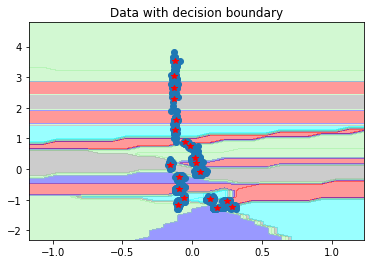

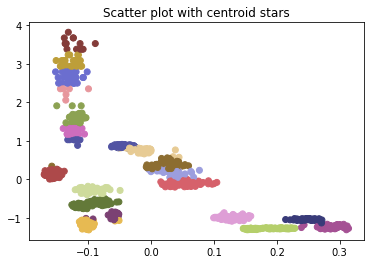

In [21]:
# (b)
# k-means
#The train-test split to be used for the dataset is 80%-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
#Mean centering and normalization
mean = np.mean(X_train, axis=0)
std = np.std(X_train)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

#K-Means -> pretending it is unsupervised
kmeans = KMeans(n_clusters=20, max_iter=1000, random_state=200)
kmeans.fit(X_train)
center = kmeans.cluster_centers_
y_pred_tr = kmeans.predict(X_train)
y_pred_ts = kmeans.predict(X_test)

# print accuracy on training and testing datasets
count_pred = np.sum(y_train == y_pred_tr, axis=0)
accuracy_train = (count_pred/y_train.shape[0])*100
print("Accuracy of training dataset is",accuracy_train, '%')

count_pred = np.sum(y_test == y_pred_ts, axis=0)
accuracy_test = (count_pred/y_test.shape[0])*100
print("Accuracy of test dataset is",accuracy_test, '%')

#adapted from sklearn examples#
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_pred_tr))])
x1_low, x1_high = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_low, x2_high = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_low, x1_high, 0.1), np.arange(x2_low, x2_high, 0.1))
z = kmeans.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
plt.figure()
plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
#plt.xlim(xx1.min(), xx1.max())
#plt.ylim(xx2.min(), xx2.max())
plt.plot(X_train[:,0], X_train[:,1], 'o')
plt.title("Data with decision boundary")
plt.plot(center[:,0], center[:,1], 'r*')

plt.figure()
plt.title('Scatter plot with centroid stars')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_tr, cmap='tab20b')
plt.show()

Accuracy of training dataset is 100.0 %
Accuracy of test dataset is 97.16666666666667 %


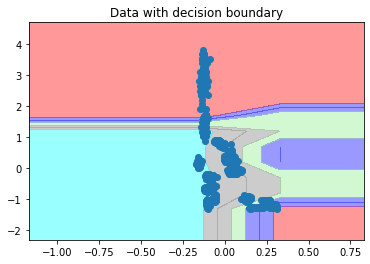

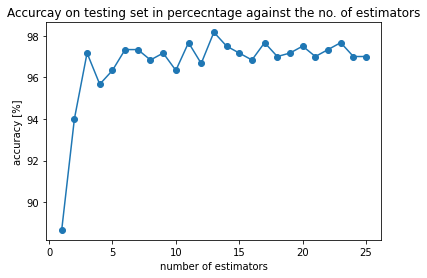

In [24]:
# (c)
# random forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


y_pred_tr = rfc.predict(X_train)
y_pred_ts = rfc.predict(X_test)

count_pred = np.sum(y_train == y_pred_tr, axis=0)
accuracy_train = (count_pred/y_train.shape[0])*100
print("Accuracy of training dataset is",accuracy_train, '%')

count_pred = np.sum(y_test == y_pred_ts, axis=0)
accuracy_test = (count_pred/y_test.shape[0])*100
print("Accuracy of test dataset is",accuracy_test, '%')

#adapted from sklearn examples#
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_pred_tr))])
x1_low, x1_high = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_low, x2_high = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_low, x1_high, 0.5), np.arange(x2_low, x2_high, 0.5))
z = rfc.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
plt.figure()
plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.plot(X_train[:,0], X_train[:,1], 'o')
plt.title("Data with decision boundary")

num = np.arange(1, 26)
accuracy_num = []
for k in range(1, len(num)+1):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_pred_nm = rfc.predict(X_test)
    
    count_pred = np.sum(y_test == y_pred_nm, axis=0)
    accuracy_num.append((count_pred/y_test.shape[0])*100)
    

plt.figure()
plt.plot(num, accuracy_num,'-o')
plt.xlabel('number of estimators')
plt.ylabel('accuracy [%]')
plt.title('Accurcay on testing set in percecntage against the no. of estimators')
plt.show()

# (d)
# Analysis
When comparing the plots of kmeans versus random forest (RF), we can see that the decision boundary is significantly different. It's difficult to understand the decision boundary of the random forest despite it's high accuracy. Although the kmeans has a much lower accuracy because it performs an unsupervised learning algorithm where the labels are unknown, the decision boundary is much clearer. The decision boundary is much different for the random forest because is performs a supervised learning algorithm where the labels are given, thus increasing it's accuracy. If possible, it is clear that one should train with labels to increase accuracy in predicting labels.
